## This notebook will serve for creating simple plots from generated data

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
# load data from csv and concat them
def loadDF(algoName, folderName, nList):  
    fileNameTemplate = './Output/{0}_{1}_{2}.csv'

    df = None
    for n in nList:
        if df is None:
            df = pd.read_csv(fileNameTemplate.format(folderName, algoName, n))
        else:
            df = pd.concat([df, pd.read_csv(fileNameTemplate.format(folderName, algoName, n))], ignore_index=True)
    
    # make all ids positive
    df['KnapsackId'] = abs(df['KnapsackId'])
    return df

In [3]:
# load results.csv
res = pd.read_csv('results.csv')
res['n'] = res['FileName'].str[2:]
res['folder'] = res['FileName'].str[:2]
# res.head()

In [8]:
# staci zadat nazev algoritmu a pak collectnout vytvorene grafy a statistiky
# + lze omezit/rozsirit nacitane nka
NR = 'NR'
ZR = 'ZR'
algoName = 'BranchAndBound'
nList = [4,10,15,20,22,25,27]#,30,32]#,35,37,40

df_nr = loadDF(algoName, NR, nList)
df_zr = loadDF(algoName, ZR, nList)
display(df_nr.head())

,KnapsackId,NumberOfItems,CpuTime,NodesVisited,CanBeSolved
0,1,4,0.0,6,1
1,2,4,0.0,1,1
2,3,4,0.0,0,1
3,4,4,0.0,1,1
4,5,4,0.0,4,0


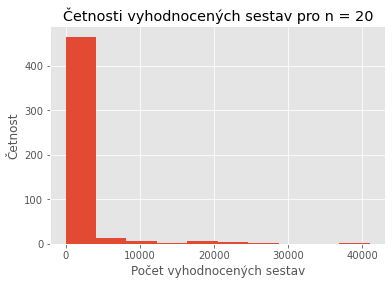

,KnapsackId,NumberOfItems,CpuTime,NodesVisited,CanBeSolved
1684,185,20,0.015625,9658,1


,KnapsackId,NumberOfItems,CpuTime,NodesVisited,CanBeSolved
1923,424,20,0.0,2018,1
1943,444,20,0.0,4797,0
1944,445,20,0.0,4809,0
1950,451,20,0.0,13158,0
1999,500,20,0.0,37495,0


0.015625
1122.922


In [32]:
plt.hist(df_nr[df_nr['NumberOfItems'] == 20]['NodesVisited'])
plt.ylabel('Četnost')
plt.xlabel('Počet vyhodnocených sestav')
plt.title('Četnosti vyhodnocených sestav pro n = 20')
plt.show()

display(df_nr[(df_nr['NumberOfItems'] == 20) & (df_nr['CpuTime'] > 0)])
display(df_nr[(df_nr['NumberOfItems'] == 20) & (df_nr['NodesVisited'] > 2000)].tail())
print(df_nr[df_nr['NumberOfItems'] == 20]['CpuTime'].max())
print(df_nr[df_nr['NumberOfItems'] == 20]['NodesVisited'].mean())

In [5]:
def getFinalTable(resCsv, df, folderName, algoName):
    df_final = pd.DataFrame(columns=['n', 'Avg_Nodes_Visited', 'Avg_Cpu_Time', 'Max_Cpu', 'Max_Nodes_Visited', 'Total_CPU'])
    for n in df.NumberOfItems.unique():
        row_data = [
            n,
            df[df.NumberOfItems == n]['NodesVisited'].mean(),#/10000,
            resCsv.loc[(resCsv['n'] == str(n)) & (resCsv['AlgoName'] == algoName) & (resCsv['folder'] == folderName)].iloc[0].CpuTime/len(df[df.NumberOfItems == n]),
            df[df.NumberOfItems == n]['CpuTime'].max(),
            df[df.NumberOfItems == n]['NodesVisited'].max(),
            resCsv.loc[(resCsv['n'] == str(n)) & (resCsv['AlgoName'] == algoName) & (resCsv['folder'] == folderName)].iloc[0].CpuTime
        ]
        df_final.loc[len(df_final)] = row_data
    return df_final

In [6]:
df_nr_final = getFinalTable(res, df_nr, NR, algoName)
df_zr_final = getFinalTable(res, df_zr, ZR, algoName)
display(df_nr_final.head())

,n,Avg_Nodes_Visited,Avg_Cpu_Time,Max_Cpu,Max_Nodes_Visited,Total_CPU
0,4.0,3.184,0.000812,0.000000,12.0,0.406250
1,10.0,21.092,0.000781,0.015625,277.0,0.390625
2,15.0,153.314,0.000594,0.015625,3535.0,0.296875
3,20.0,1122.922,0.000719,0.015625,41055.0,0.359375
4,22.0,3596.998,0.001125,0.015625,191770.0,0.562500


In [7]:
def plotHistAVGNodesVisited(df_nr, mainLabel, df_zr = None):
    plt.bar(df_nr['n'], df_nr['Avg_Nodes_Visited'], align='center', color='r')
    if df_zr is not None:
        plt.bar(df_zr['n'] + 0.75, df_zr['Avg_Nodes_Visited'], align='center', color='g')
    
#     plt.ylim(0, 6.5*1e7)
    plt.title(mainLabel)
    plt.xlabel('n')
    plt.ylabel('Prům. počet navštívených nodů/batoh')
    plt.show()

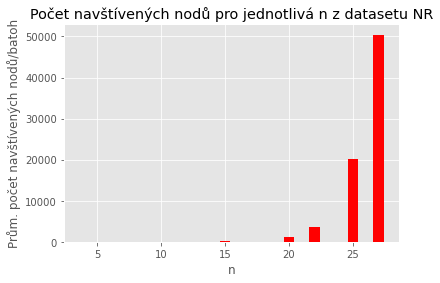

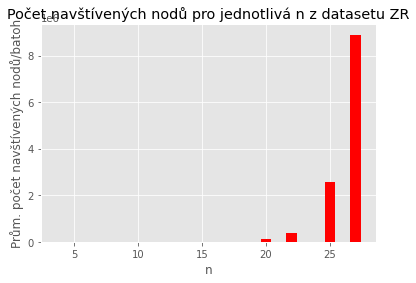

In [8]:
plotHistAVGNodesVisited(df_nr_final, 'Počet navštívených nodů pro jednotlivá n z datasetu ' + NR)
plotHistAVGNodesVisited(df_zr_final, 'Počet navštívených nodů pro jednotlivá n z datasetu ' + ZR)
# # change n type to int
# df_final = df_final.astype({'n': int})
# # plotHistAVGNodesVisited(bnb_nr_final[bnb_nr_final['n'] <= 20], 'Počet navštívených nodů pro jednotlivá n z datasetu ' + folderName)

In [9]:
def plotHistAvgCpuTimes(df, mainLabel, df_zr = None):
    plt.bar(df['n'],df['Avg_Cpu_Time'], align='center', color='r')
    if df_zr is not None:
        plt.bar(df_zr['n'] + 0.75, df_zr['Avg_Cpu_Time'], align='center', color='g')
        
#     plt.ylim(0, 0.65)
    plt.title(mainLabel)
    plt.xlabel('n')
    plt.ylabel('Prům. CPU čas/batoh ve vteřinách')
    plt.show()

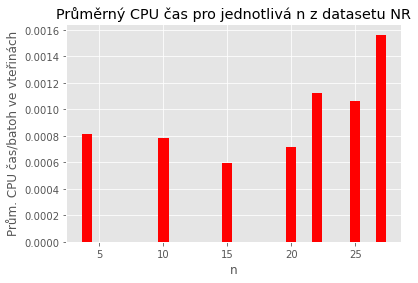

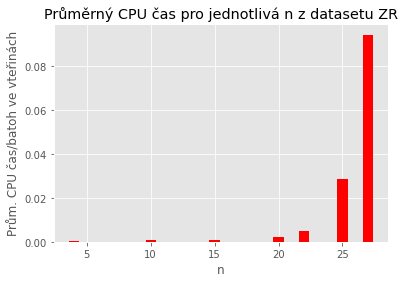

In [10]:
plotHistAvgCpuTimes(df_nr_final, 'Průměrný CPU čas pro jednotlivá n z datasetu ' + NR)
plotHistAvgCpuTimes(df_zr_final, 'Průměrný CPU čas pro jednotlivá n z datasetu ' + ZR)

In [11]:
def plotHistCpuTimes(df, mainLabel, df_zr = None):
    plt.bar(df['n'],df['Total_CPU'], align='center', color='r')
    if df_zr is not None:
        plt.bar(df_zr['n'] + 0.75, df_zr['Total_CPU'], align='center', color='g')
    
#     plt.ylim(0, 320)
    plt.title(mainLabel)
    plt.xlabel('n')
    plt.ylabel('CPU čas pro složku ve vteřinách')
    plt.show()

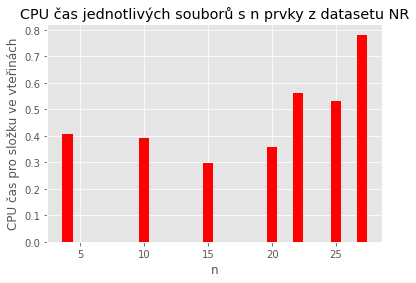

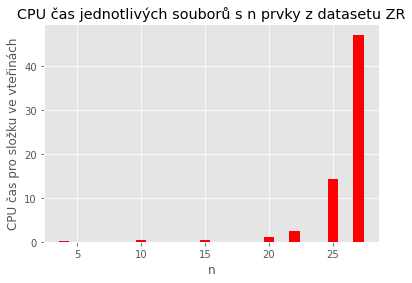

In [12]:
plotHistCpuTimes(df_nr_final, 'CPU čas jednotlivých souborů s n prvky z datasetu ' + NR)
plotHistCpuTimes(df_zr_final, 'CPU čas jednotlivých souborů s n prvky z datasetu ' + ZR)

In [13]:
def plotHistMaxCpuTimes(df, mainLabel, df_zr = None):
    plt.bar(df['n'],df['Max_Cpu'], align='center', color='r')
    if df_zr is not None:
        plt.bar(df_zr['n'] + 0.75, df_zr['Max_Cpu'], align='center', color='g')
    
#     plt.ylim(0, 2.1)
    plt.title(mainLabel)
    plt.xlabel('n')
    plt.ylabel('Max CPU čas batohu ve vteřinách')
    plt.show()

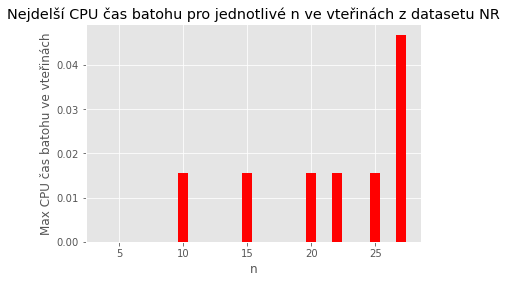

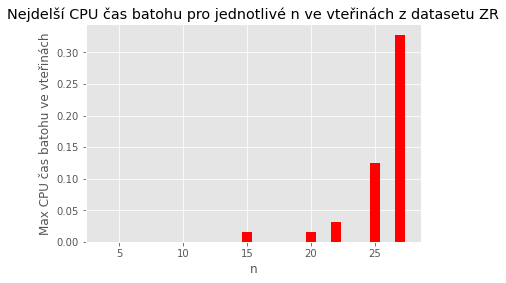

In [14]:
plotHistMaxCpuTimes(df_nr_final, 'Nejdelší CPU čas batohu pro jednotlivé n ve vteřinách z datasetu ' + NR)
plotHistMaxCpuTimes(df_zr_final, 'Nejdelší CPU čas batohu pro jednotlivé n ve vteřinách z datasetu ' + ZR)